https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners#%F0%9F%93%9A-NLP-(Natural-Language-Processing)-with-Python

### 0. 예제로 CountVectorizer 사용해 보기

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']
simple_test = ["please don't call me"]

vect= CountVectorizer()
vect.fit(simple_train)

simple_train_dtm= vect.transform(simple_train)
simple_test_dtm= vect.transform(simple_test)

print('<simple_train>')
display(pd.DataFrame(simple_train_dtm.toarray(), columns= vect.get_feature_names_out()))
print('<simple_test>')
display(pd.DataFrame(simple_test_dtm.toarray(), columns= vect.get_feature_names_out()))

<simple_train>


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


<simple_test>


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### 1. 데이터 불러오기, 필요없는 열 삭제, 나머지를 적당한 이름으로 바꾸기

In [11]:
df= pd.read_csv('Dataset/spam.csv', encoding= 'latin-1')
df.dropna(how= 'any', axis= 1, inplace= True) # 결측치가 존재하는 열을 삭제한다.
df.columns= ['label', 'message']

### 2. EDA

In [14]:
df.groupby('label').describe()
# ham(4825)이 spam(747)보다 많다.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#### 1. ham:0, spam:1로 바꾼다.

In [15]:
df['label_num']= df.label.map({'ham':0, 'spam':1})

#### 2. message 단어 개수 지정 후 그래프로 빈도 확인

In [19]:
df['message_len']= df.message.apply(len)
# apply: 파라미터로 전달된 함수를 데이터프레임, 시리즈의 모든 값에 적용하여 결과를 반환한다.

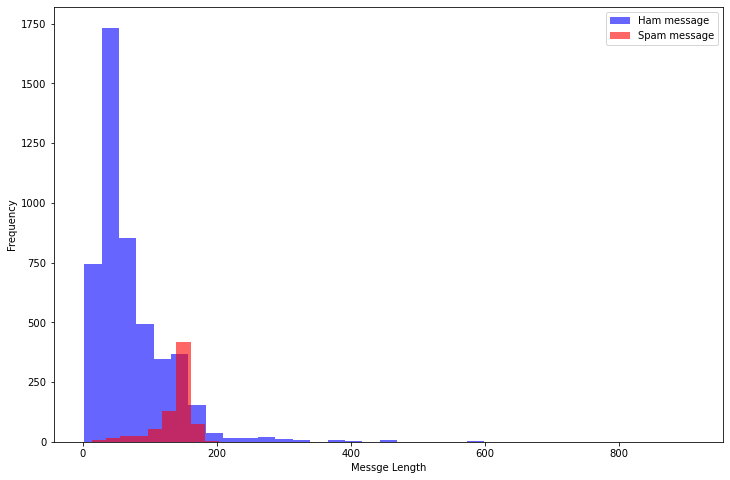

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,8))
df[df.label== 'ham'].message_len.plot(bins= 35, kind= 'hist', color= 'blue',label= 'Ham message', alpha= 0.6)
df[df.label== 'spam'].message_len.plot(kind= 'hist', color= 'red', label= 'Spam message', alpha= 0.6)

plt.legend()
plt.xlabel('Messge Length')
plt.show()
# spam의 글자수가 많은게 보인다.

In [25]:
df[df.label== 'ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000
